# 0. Introducción
El dataset `Iris` es un conjunto de datos de clasificación multiclase clásico y muy sencillo. Introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos de Iris contiene cuatro características (longitud y anchura de sépalos y pétalos) de 50 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor).

El objetivo es construir un modelo que utilice las características para clasificar las flores con un máximo de precisión. Para alcanzar este objetivo, vamos a realizar un análisis exploratorio de datos para comprender los datos y elegir las mejores características.

Este notebook se centrará principalmente en...

https://www.kaggle.com/code/joeportilla/analisis-exploratorio-de-datos-dataset-iris

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)
Fuente: https://www.datacamp.com/tutorial/machine-learning-in-r

### Referencias:
- [Wikipedia](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris/)

### Instructor:
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla

# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Preprocesamiento

## 2.1. Lectura de CSV

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 2.2. Preprocesamiento

### Renombramiento de columnas 

Se renombran las columnas para facilitar su uso.

In [5]:
df.rename({'SepalLengthCm':'sepal_l',
           'SepalWidthCm':'sepal_w',
           'PetalLengthCm':'petal_l',
           'PetalWidthCm':'petal_w',
           'Species':'species'},
          axis=1, inplace=True)

### Eliminación de columnas

Se elimina la columna 'id', ya que no es necesaria dentro del analisis.

In [6]:
df.drop('Id', axis=1, inplace=True)

### Creación de target

In [7]:
df['target'] = df['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [8]:
df.head(7)

,sepal_l,sepal_w,petal_l,petal_w,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0


# 3. Feature Engineering

We'll use the petal length and width only for this analysis

In [9]:
df_model = df.drop(['sepal_l','sepal_w'], axis=1)

In [10]:
df_model

,petal_l,petal_w,species,target
0,1.4,0.2,Iris-setosa,0
1,1.4,0.2,Iris-setosa,0
2,1.3,0.2,Iris-setosa,0
3,1.5,0.2,Iris-setosa,0
4,1.4,0.2,Iris-setosa,0
...,...,...,...,...
145,5.2,2.3,Iris-virginica,2
146,5.0,1.9,Iris-virginica,2
147,5.2,2.0,Iris-virginica,2
148,5.4,2.3,Iris-virginica,2


# 4. Preparación del dataset para modelamiento

In [11]:
X = df_model.drop(['species','target'], axis=1)
Y = df_model['target']

In [12]:
X.head()

,petal_l,petal_w
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [13]:
X = X.values
Y = Y.values

In [14]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5. Baseline Model

What is the simples model we can think of?

In this case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point, we could expect to have a model accuracy of 0.33 or 33%, since we have 3 different classes that are evenly balanced-

So our models should at least beat 33% accuracy

so this is the absolute worst that any model we create should do if our model isn't at least doing 33% accuracy then we would be better off by randomly guessing so this is kind of the the floor and this

this is basically our model this single the single function here with with very simple you know if else rules and you might be surprised to learn that this is actually kind of what happens for some machine learning model so there's actually tree-based models so decision tree based models which do basically this kind of if-else thing they just they automatically do it for you but under the hood you know you're just doing a bunch of if-else statements and that's what decision trees are which are or you know they used to be very very popular machine learning models i think that maybe these days not quite as much anymore but you'll still see people

# 6. Modelo Manual

In [15]:
def manual_model(petal_l):
    if petal_l < 2.5:
        return 0
    elif petal_l < 5:
        return 1
    else:
        return 2

In [16]:
X[:,0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [17]:
manual_pred = np.array([])

for i in X[:,0]:
    pred_i = manual_model(i)
    manual_pred = np.append(manual_pred, pred_i)

In [18]:
manual_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [19]:
manual_pred == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,

In [20]:
np.mean(manual_pred == Y)

0.9466666666666667

In [21]:
manual_score = np.mean(manual_pred == Y)
print(f'Exactitud del modelo manual: {manual_score*100:.2f}%')

Exactitud del modelo manual: 94.67%


# 8. Modelo con Regresión Lógistica

In [22]:
from sklearn.linear_model import LogisticRegression

## 8.1. Entrenamiento y evaluación del modelo mediante un set de evaluación

Train and test on the same dataset
This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
There is also a risk of overfitting the training data.

Split the dataset into a training set and a testing set
Advantages
By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
This ensures that we won't use the same observations in both sets.
More flexible and faster than creating a model using all of the dataset for training.
Disadvantages
The accuracy scores for the testing set can vary depending on what observations are in the set.
This disadvantage can be countered using k-fold cross-validation.
Notes
The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
If a model is too complex or not complex enough, the testing accuracy is lower.
For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

### Generación del set de entrenamiento y evaluación

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [25]:
print(f'Nro. muestras entrenamiento: {X_train.shape[0]}\nNro. de muestras evaluación: {X_test.shape[0]}')

Nro. muestras entrenamiento: 120
Nro. de muestras evaluación: 30


### Entrenamiento

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

LogisticRegression()

### Rendimiento en conjunto de evaluación

In [28]:
Y_pred = model.predict(X_test)

In [29]:
Y_pred

array([2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2,
       1, 2, 0, 1, 1, 0, 2, 1])

In [30]:
np.mean(Y_pred == Y_test)

0.8666666666666667

In [31]:
model.score(X_test, Y_test)

0.8666666666666667

## 8.2. Evaluación del modelo mediante validación cruzada

![](https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/featured.png)

In [32]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [33]:
performance = cross_val_score(model, X, Y, cv=5, scoring='accuracy')

In [34]:
performance

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [35]:
np.mean(performance)

0.96

miss classifying points so the first thing that we need to do here is we need to get a list of predictions now since we're using this cross Val score what it's doing actually is it's it's fitting this model five different times and making five different sets of predictions and you know that's how it's doing this k-fold cross-validation but it's just returning the accuracy here it's not actually returning the predictions themselves so the way that we get the actual predictions using this kind of cross validated approach is this other function that we imported right here cross Val predict so cross Val predict

## 8.3. Identificación de valores mal clasificados

In [36]:
Y_pred = cross_val_predict(model, X, Y, cv=5)

In [37]:
Y_pred == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

mask

In [38]:
correct_mask = (Y_pred == Y)
wrong_mask = ~correct_mask

In [39]:
X[wrong_mask]

array([[4.8, 1.8],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.7],
       [5. , 1.5],
       [5.1, 1.5]])

In [40]:
df_pred = df_model.copy()
df_pred['pred'] = Y_pred
df_pred['correct_pred'] = correct_mask

In [41]:
filt = (df_pred['correct_pred']==False)
df_pred.loc[filt]

,petal_l,petal_w,species,target,pred,correct_pred
70,4.8,1.8,Iris-versicolor,1,2,False
77,5.0,1.7,Iris-versicolor,1,2,False
83,5.1,1.6,Iris-versicolor,1,2,False
106,4.5,1.7,Iris-virginica,2,1,False
119,5.0,1.5,Iris-virginica,2,1,False
133,5.1,1.5,Iris-virginica,2,1,False


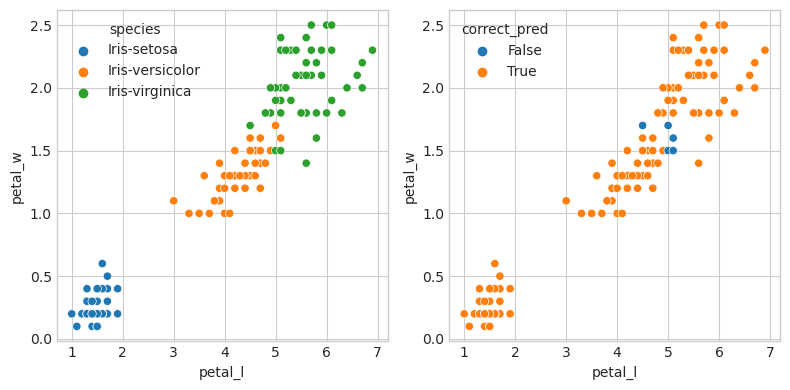

In [42]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True)

sns.scatterplot(data=df_pred, x="petal_l", y="petal_w", ax=ax[0], hue="species")

sns.scatterplot(data=df_pred, x="petal_l", y="petal_w", ax=ax[1], hue="correct_pred")

plt.tight_layout()

## 9. Conclusiones